In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

# MNIST 데이터셋 로드
train_set = torchvision.datasets.MNIST(
    root = './data/MNIST',
    train = True,
    download = True,
)
test_set = torchvision.datasets.MNIST(
    root = './data/MNIST',
    train = False,
    download = True,
)

In [2]:
import numpy as np
train_images,train_labels = np.array(train_set.data),np.array(train_set.targets)
test_images, test_labels = np.array(test_set.data),np.array(test_set.targets)

In [3]:
train_images = train_images.reshape(60000,-1)
test_images = test_images.reshape(10000,-1)

In [4]:
print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [5]:
from tqdm import tqdm
from MNIST_FC import MNIST_FN
model = MNIST_FN()

In [14]:
import operators as nn
from tqdm.auto import tqdm
epoch = 15
learning_rate =0.005
batch_size = 200
model_train_loss = []
model_train_accuracy = []

optimizer = nn.Adam(lr=learning_rate)
# optimizer = nn.SGD(lr=learning_rate)
iter_num =50000 // batch_size

for e in range(epoch):
    train_loss =0
    test_loss =0 
    previous_b = 0
    for b in tqdm(range(iter_num)):
        mask = np.random.choice(train_images.shape[0], batch_size)
        X = train_images[mask]
        y = train_labels[mask]
        previous_b = b
        grad= model.backward(X,y)
        optimizer.update(grad,model.weights)
        loss = model.loss(X, y)
        train_loss += loss
        break
    break
    model_train_loss.append(train_loss/iter_num)
    test_mask = np.random.choice(test_images.shape[0], batch_size)
    validation_acc = model.accuracy(X,y)
    model_train_accuracy.append(validation_acc)
        # for i in ("W1","B1","W2","B2","W3","B3","W4","B4"):
        #     model.weights[i] -= learning_rate * grad[i] 

    print(f"epoch : {e} , train loss : {train_loss}")
    print("acc : " , validation_acc) 


  0%|          | 0/250 [00:00<?, ?it/s]

86.01636629419288


In [10]:
print(model_train_loss)
print(model_train_accuracy)

[60.339035410232086, 60.740338115293305, 61.93434499032733, 63.23085668051431, 64.48099134369525, 66.15001168105758, 67.79662815566813, 69.61266242622996, 71.12780239789453, 73.01082387919362, 75.32174436512736, 77.53527785403844, 79.51176040623743, 82.19218279040781, 84.20439074791253]
[0.935, 0.91, 0.95, 0.95, 0.975, 0.975, 0.96, 0.97, 0.995, 0.985, 0.975, 0.995, 0.97, 0.995, 0.99]


In [11]:

test_loss =[]
previous_b = 0
iter_num =10000 // 200
count=0
for b in range(iter_num):
    mask = np.random.choice(test_images.shape[0], batch_size)
    X = test_images[mask]
    y = test_labels[mask]
    pred_y = model.accuracy(X,y)
    print(pred_y,count)
    test_loss.append(pred_y)
    count+=1
print(sum(test_loss)/iter_num)

        

0.945 0
0.955 1
0.955 2
0.97 3
0.97 4
0.94 5
0.945 6
0.97 7
0.965 8
0.975 9
0.95 10
0.955 11
0.96 12
0.96 13
0.965 14
0.95 15
0.965 16
0.975 17
0.955 18
0.93 19
0.965 20
0.95 21
0.92 22
0.94 23
0.945 24
0.955 25
0.925 26
0.95 27
0.95 28
0.94 29
0.955 30
0.965 31
0.945 32
0.96 33
0.965 34
0.97 35
0.96 36
0.97 37
0.97 38
0.98 39
0.97 40
0.95 41
0.97 42
0.955 43
0.955 44
0.96 45
0.945 46
0.96 47
0.93 48
0.98 49
0.9561999999999997


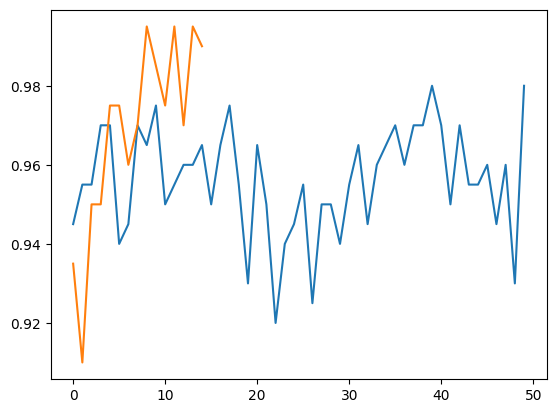

In [13]:
import matplotlib.pyplot as plt


plt.plot(test_loss)
plt.plot(model_train_accuracy)
plt.show()